In [1]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

<font size=10><b>Model Selection - Exercise</b></font>

# Q1 - Read Data
Load the Wine Quality dataset (data dictionary attached)

In [2]:
# your code here
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/danfinel/Downloads/winequality-red.csv')

# Q2 - EDA and preprocesssing
Perform a short EDA and basic preprocessing if needed

In [3]:
# your code here
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
260,7.9,0.33,0.23,1.7,0.077,18.0,45.0,0.99625,3.29,0.65,9.3,5
190,8.2,0.50,0.35,2.9,0.077,21.0,127.0,0.99760,3.23,0.62,9.4,5
505,10.2,0.49,0.63,2.9,0.072,10.0,26.0,0.99680,3.16,0.78,12.5,7
1579,6.2,0.56,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1357,7.3,0.43,0.24,2.5,0.078,27.0,67.0,0.99648,3.60,0.59,11.1,6


In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['quality'])
y = df.quality
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


In [8]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

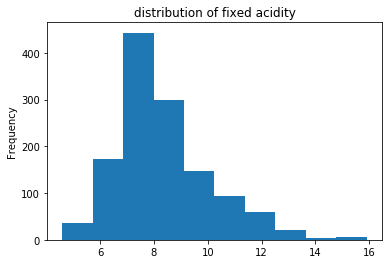

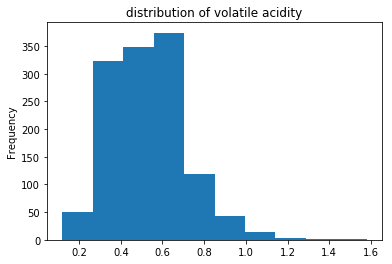

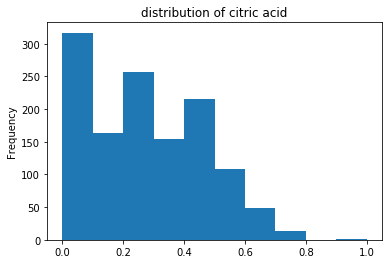

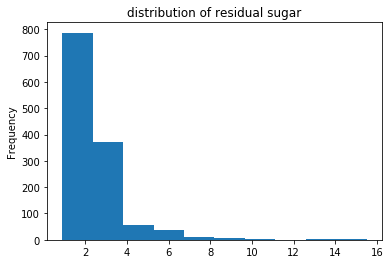

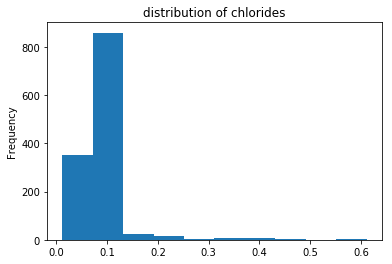

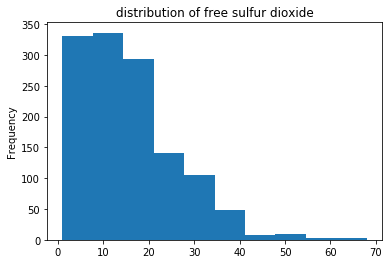

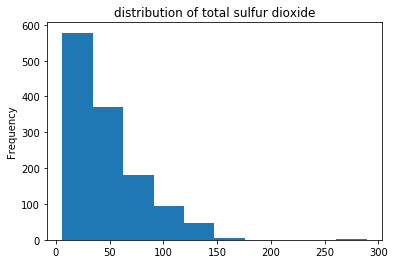

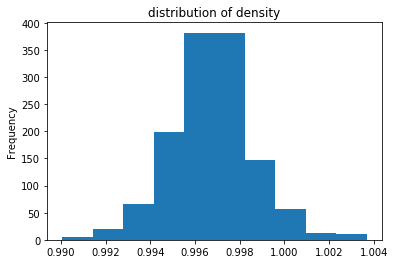

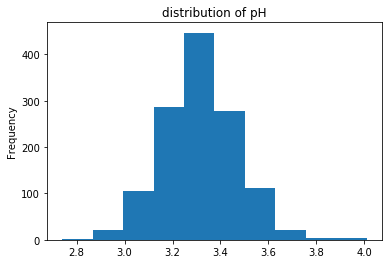

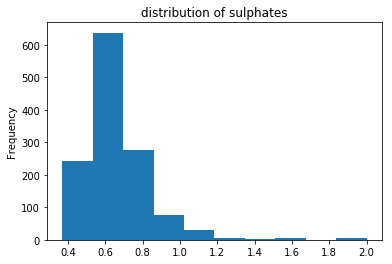

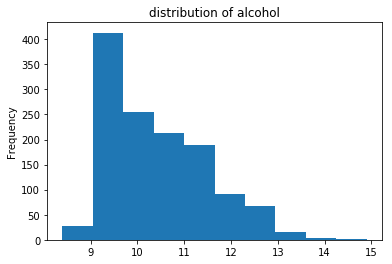

In [9]:
import matplotlib.pyplot as plt
for col in X_train.columns:
    f = plt.figure()
    X_train[col].plot(kind = 'hist', title = f'distribution of {col}')
    plt.show()

In [10]:
for col in X_train.columns : 
    lower_bound = X_train[col].mean() - 3 * X_train[col].std()
    upper_bound = X_train[col].mean() + 3 * X_train[col].std()
    X_train.loc[X_train[col] < lower_bound,col] = lower_bound
    X_train.loc[X_train[col] > upper_bound,col] = upper_bound


/Users/danfinel/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/danfinel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/danfinel/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

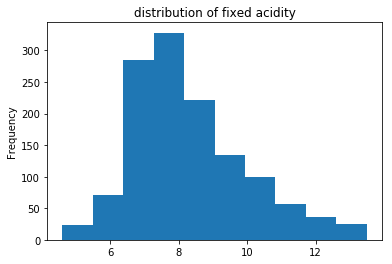

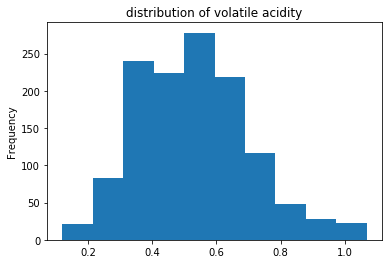

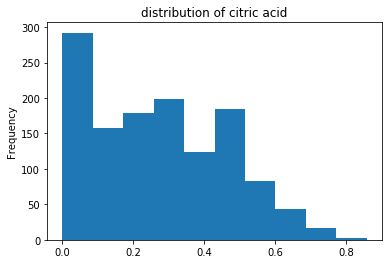

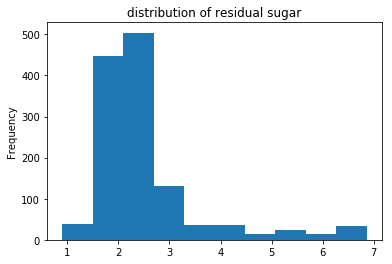

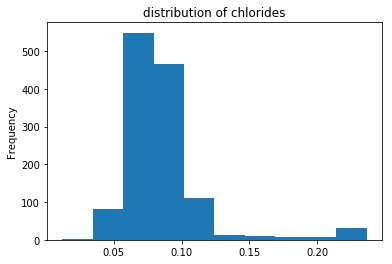

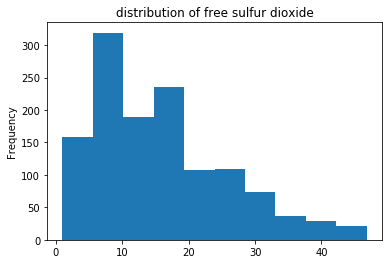

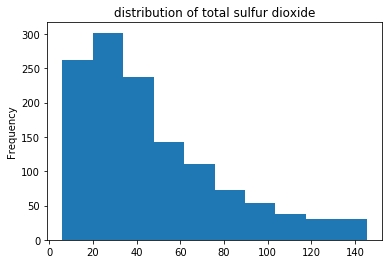

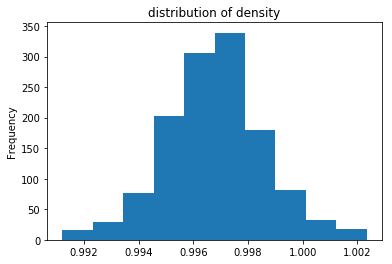

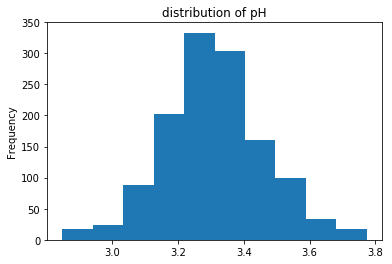

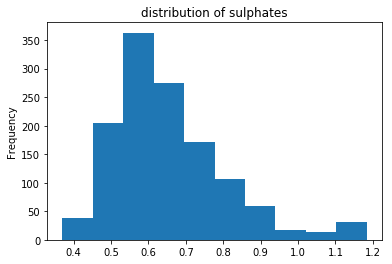

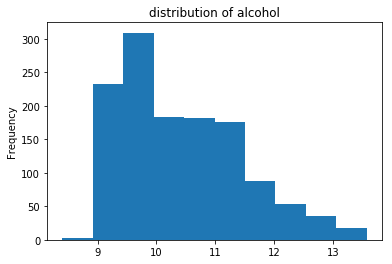

In [11]:
for col in X_train.columns : 
    plt.figure()
    X_train[col].plot(kind = 'hist', title = f'distribution of {col}')
    plt.show()
    

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)


In [13]:
X_train.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1196,-0.776819,0.633412,-1.294157,-0.364873,-0.582685,-0.680892,-0.729742,0.124525,1.043760,0.095969,-0.972840
660,-0.363374,-0.683666,2.500719,-0.642657,4.712476,-0.781273,-0.046678,0.015084,-1.652507,3.480554,-0.972840
637,1.703854,-0.168287,2.398155,2.459265,0.448565,-1.082416,-0.916032,1.547263,-0.600305,-0.233375,0.751264
157,-0.954010,-0.397344,-0.165950,-0.735252,-0.270185,0.222536,-0.388210,-1.079331,0.517659,-0.365112,0.176563
963,-1.072138,0.003505,-1.089028,-0.457468,-0.707684,1.326726,-0.077726,-1.030082,0.451897,1.149870,-0.110788


# Q3 - Data set splits
- Separate the data into X (independent features) and y
- Split the data into **train**, **validation** and **test** sets.
- Put the **test set** aside till the final question of the exercise
- In addition to the 3 sets above, also save a dataset that's **train and validation sets together** in 1 DataFrame as `X_train_val` and `y_train_val` (will be needed later).

In [14]:
# your code here
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size = 0.2,random_state = 42)

In [15]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((1023, 11), (1023,), (256, 11), (256,))

In [16]:
X_train_val = pd.concat([X_train,X_val], axis = 0, join = 'inner')
y_train_val = pd.concat([y_train,y_val], axis = 0)

# Q4 - Model selection with validation set
- Refer to the problem as a **regression** problem
- Choose 3 different ML models of **different model types** with default or relatively basic hyperparameters
- Train them **on train set**
- Evaluate all 3 seperately **on validation set**
- Explain which is the best model in your opinion based on **validation metric**

In [17]:
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
regs = [('LogisticRegression',LogisticRegression(max_iter = 1000)),
        ('RandomForest',RandomForestRegressor(n_estimators = 80, min_samples_split = 20)),
        ('AdaBoostRegressor',GradientBoostingRegressor())]

best_r2 = 0
for reg_name,reg in regs:
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_val)
    r2 = r2_score(y_val,y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_reg = reg_name
        
    
    

In [18]:
best_r2.round(4),best_reg

(0.3746, 'RandomForest')

Based on the r2 score, the RandomForest model looks to be the best model.

# Q5 - Model selection with cross validation
Choose **one** of the **model types** above and using it do:

## Q5.1 - Cross validation
- Choose a method of cross validation.  Why did you choose it?
- Use the exact hyperparameters chosen in the question above
- Train and evaluate the model using the cross validation method
- Explain the results
- For dataset, **use the train and validation sets together** in 1 DataFrame (`X_train_val` and `y_train_val`)

I choose the cross_validate method to get many metrics and be able to evaluate the model not only in one specific metric. I also use stratifiedkfold to keep the same proportion of classes in the target variable.

In [19]:
# your code here
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
skf = StratifiedKFold(n_splits = 5)
scores = cross_validate(RandomForestRegressor(n_estimators = 80,min_samples_split = 20),
                        X_train_val,y_train_val,cv = skf, scoring = ('r2','neg_mean_squared_error','neg_mean_absolute_error'))

In [20]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.382891,0.011002,0.430672,-0.366316,-0.451055
1,0.339900,0.010842,0.404470,-0.390816,-0.469091
2,0.372274,0.012210,0.486078,-0.340241,-0.435450
3,0.366410,0.012298,0.350209,-0.419356,-0.492798
4,0.356263,0.014930,0.428413,-0.368875,-0.454355


In [21]:
def print_val_scores(list_scores):
    print(f'Mean : {list_scores.mean().round(3)}, all : {list_scores.round(3)}')

In [22]:
print('r2 : ')
print_val_scores(scores['test_r2'])
print('neg_mean_squared_error :')
print_val_scores(scores['test_neg_mean_squared_error'])
print('neg_mean_absolute_error :')
print_val_scores(scores['test_neg_mean_absolute_error'])

r2 : 
Mean : 0.42, all : [0.431 0.404 0.486 0.35  0.428]
neg_mean_squared_error :
Mean : -0.377, all : [-0.366 -0.391 -0.34  -0.419 -0.369]
neg_mean_absolute_error :
Mean : -0.461, all : [-0.451 -0.469 -0.435 -0.493 -0.454]


## Q5.2 - Grid Search
- Perform **Grid Search** of multiple hyperparameters with cross validation
- Report different models cross validation scores
- Which model was chosen by the Grid Search and why?
- For dataset, **use the train and validation sets together** in 1 DataFrame (`X_train_val` and `y_train_val`)



In [23]:
from sklearn.model_selection import GridSearchCV
parameters_rf = [{'n_estimators':[20,50,100],
                 'max_depth':[20,50,None],
                 'min_samples_split': [2,10,20]}]

reg_rf = GridSearchCV(RandomForestRegressor(),param_grid = parameters_rf,n_jobs = -1,cv = skf, scoring = 'r2')
reg_rf.fit(X_train_val,y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [20, 50, None],
                          'min_samples_split': [2, 10, 20],
                          'n_estimators': [20, 50, 100]}],
             scoring='r2')

In [24]:
pd.DataFrame(reg_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.214080,0.002010,0.009982,0.002770,20,2,20,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.458451,0.334847,0.437301,0.388327,0.453155,0.414416,0.046852,20
1,0.514230,0.006129,0.022726,0.000477,20,2,50,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.440545,0.399211,0.500454,0.399290,0.455547,0.439010,0.037981,6
2,0.950994,0.022825,0.026287,0.004959,20,2,100,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.481642,0.422040,0.500670,0.397429,0.460297,0.452416,0.037923,2
3,0.185695,0.002073,0.010514,0.002353,20,10,20,"{'max_depth': 20, 'min_samples_split': 10, 'n_...",0.446991,0.383313,0.463600,0.346008,0.462488,0.420480,0.047443,14
4,0.418297,0.034631,0.015990,0.004213,20,10,50,"{'max_depth': 20, 'min_samples_split': 10, 'n_...",0.427777,0.389824,0.469200,0.378971,0.438205,0.420795,0.032873,13
5,1.017997,0.032855,0.030018,0.007201,20,10,100,"{'max_depth': 20, 'min_samples_split': 10, 'n_...",0.446181,0.399999,0.488130,0.378360,0.450263,0.432587,0.038948,8
6,0.176729,0.012419,0.010578,0.001744,20,20,20,"{'max_depth': 20, 'min_samples_split': 20, 'n_...",0.423176,0.374426,0.457626,0.345133,0.418526,0.403778,0.039482,27
7,0.474928,0.019355,0.016124,0.005682,20,20,50,"{'max_depth': 20, 'min_samples_split': 20, 'n_...",0.425617,0.401105,0.466955,0.364041,0.431324,0.417808,0.034144,19
8,1.091499,0.039066,0.041915,0.004651,20,20,100,"{'max_depth': 20, 'min_samples_split': 20, 'n_...",0.426190,0.403109,0.480066,0.362546,0.429742,0.420331,0.038280,15
9,0.257542,0.016970,0.012978,0.003717,50,2,20,"{'max_depth': 50, 'min_samples_split': 2, 'n_e...",0.448957,0.413943,0.483817,0.356005,0.429935,0.426532,0.042258,12


In [25]:
means = reg_rf.cv_results_['mean_test_score']
stds = reg_rf.cv_results_['std_test_score']
params_all = reg_rf.cv_results_['params']
print('\nScores on validation set:')
for mean_score, std_score, params in zip(means, stds, params_all):
    print(f'{mean_score:.4f} (+/-{(std_score * 2):.4f}) for {params}')


Scores on validation set:
0.4144 (+/-0.0937) for {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 20}
0.4390 (+/-0.0760) for {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
0.4524 (+/-0.0758) for {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
0.4205 (+/-0.0949) for {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 20}
0.4208 (+/-0.0657) for {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
0.4326 (+/-0.0779) for {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
0.4038 (+/-0.0790) for {'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 20}
0.4178 (+/-0.0683) for {'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 50}
0.4203 (+/-0.0766) for {'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 100}
0.4265 (+/-0.0845) for {'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 20}
0.4439 (+/-0.0772) for {'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 50}
0.4425 (+/-0.0745) for {'max_

In [26]:
reg_rf.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [27]:
reg_rf.best_score_.round(4)

0.4525

The best model is RandomForestRegressor('max_depth' = 50, 'min_samples_split' = 2, 'n_estimators' = 100)

## Q5.3 - Randomized Search
- Perform **Randomized Search** of multiple hyperparameters with cross validation
- Report different models cross validation scores
- Which model was chosen by the Randomized Search and and why?
- For dataset, **use the train and validation sets together** in 1 DataFrame (`X_train_val` and `y_train_val`)

In [28]:
# your code here
from sklearn.model_selection import RandomizedSearchCV
n_estimators = np.linspace(20,100,5).astype(int)
max_depth = np.linspace(10,50,5).astype(int)
min_samples_split = np.linspace(2,20,3).astype(int)
param_distrib = {'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split}
rs = RandomizedSearchCV(RandomForestRegressor(),param_distrib,scoring = 'r2',
                        cv = skf,n_jobs = -1, verbose = 10, random_state = 0)
rs.fit(X_train_val,y_train_val)




Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50]),
                                        'min_samples_split': array([ 2, 11, 20]),
                                        'n_estimators': array([ 20,  40,  60,  80, 100])},
                   random_state=0, scoring='r2', verbose=10)

In [29]:
pd.DataFrame(rs.cv_results_).T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.527056,0.522143,0.579862,0.950073,0.778501,0.422267,0.464338,0.920747,0.905243,0.460241
std_fit_time,0.014851,0.0244959,0.00814302,0.0212399,0.0465728,0.0120215,0.00461651,0.0136416,0.0261864,0.0140191
mean_score_time,0.0176893,0.016962,0.0195399,0.0306224,0.0284683,0.0198507,0.0225004,0.0283137,0.0227513,0.0147007
std_score_time,0.00280383,0.00159603,0.00426927,0.00455488,0.00527405,0.00581784,0.0103898,0.00601842,0.0072585,0.00203195
param_n_estimators,60,60,60,100,80,40,40,100,100,60
param_min_samples_split,11,20,11,20,20,20,11,11,2,11
param_max_depth,40,40,20,50,20,20,50,40,30,10
params,"{'n_estimators': 60, 'min_samples_split': 11, ...","{'n_estimators': 60, 'min_samples_split': 20, ...","{'n_estimators': 60, 'min_samples_split': 11, ...","{'n_estimators': 100, 'min_samples_split': 20,...","{'n_estimators': 80, 'min_samples_split': 20, ...","{'n_estimators': 40, 'min_samples_split': 20, ...","{'n_estimators': 40, 'min_samples_split': 11, ...","{'n_estimators': 100, 'min_samples_split': 11,...","{'n_estimators': 100, 'min_samples_split': 2, ...","{'n_estimators': 60, 'min_samples_split': 11, ..."
split0_test_score,0.461744,0.420043,0.427877,0.441756,0.437514,0.423044,0.449547,0.443246,0.475931,0.425307
split1_test_score,0.389721,0.394087,0.392418,0.407706,0.387641,0.403643,0.388996,0.406843,0.42246,0.387617


In [30]:
means = rs.cv_results_['mean_test_score']
stds = rs.cv_results_['std_test_score']
params_all = rs.cv_results_['params']
print('\nScores on validation set:')
for mean_score, std_score, params in zip(means, stds, params_all):
    print(f'{mean_score:.4f} (+/-{(std_score * 2):.4f}) for {params}')


Scores on validation set:
0.4259 (+/-0.0859) for {'n_estimators': 60, 'min_samples_split': 11, 'max_depth': 40}
0.4137 (+/-0.0761) for {'n_estimators': 60, 'min_samples_split': 20, 'max_depth': 40}
0.4266 (+/-0.0898) for {'n_estimators': 60, 'min_samples_split': 11, 'max_depth': 20}
0.4230 (+/-0.0776) for {'n_estimators': 100, 'min_samples_split': 20, 'max_depth': 50}
0.4118 (+/-0.0858) for {'n_estimators': 80, 'min_samples_split': 20, 'max_depth': 20}
0.4171 (+/-0.0818) for {'n_estimators': 40, 'min_samples_split': 20, 'max_depth': 20}
0.4233 (+/-0.0618) for {'n_estimators': 40, 'min_samples_split': 11, 'max_depth': 50}
0.4330 (+/-0.0839) for {'n_estimators': 100, 'min_samples_split': 11, 'max_depth': 40}
0.4475 (+/-0.0750) for {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 30}
0.4173 (+/-0.0779) for {'n_estimators': 60, 'min_samples_split': 11, 'max_depth': 10}


In [31]:
rs.best_params_

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}

The best model is RandomForestRegressor('max_depth'= 30, 'min_samples_split'= 2, 'n_estimators'= 100)

In [32]:
rs.best_score_.round(4)

0.4475

# Q6 - Choose best model
- Compare the **validation metrics** of models received in questions above (4 and 5.1-5.3)
- Which model type and hyperparameters would you choose and why?
- Evaluate the final chosen model on **test set**.  Is the **test metric** received similar to this model's **validation metric**? How confident are you using this model in production?

In q4, we got 0.3691 for the validation metric.
In q5.1, we got 0.423 
In q5.2, we got 0.4513
In q5.3, we got 0.4499

Based on the result we got, i would choose the model from q5.2 so a random forest regressor with those parameters : 
{'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 100}

In [33]:
rf_final = RandomForestRegressor(max_depth = 50,min_samples_split = 2, n_estimators = 100)
rf_final.fit(X_train_val,y_train_val)
y_pred_final = rf_final.predict(X_test)

r2 = abs(r2_score(y_test,y_pred_final))
r2

0.6241763325811802

The r2 score we get is not that high. It would be better to run the RandomizedGridSearch using more possible values for hyperparameters and also more hyperparameters (very time consuming). I am not very confident using this model in production.